In [1]:
# importar pandas
import pandas as pd

# Regplot para fazer análise da relação linear
from seaborn import regplot

In [2]:
# Ler e printar dados
Dados = pd.read_csv("Data\Base_Completa.csv", sep=";", index_col="Horario")
Dados.head()

,Tweets,Sentimento,Close,Retornos
Horario,,,,
2022-03-02 03:00:00+00:00,RT @WatcherGuru: BREAKING: Airbnb CEO says the...,0.5994,44370.246094,NaN
2022-03-02 03:00:00+00:00,RT @nima33514465: @BluesparrowC @TheMoonCarl @...,0.3612,44370.246094,NaN
2022-03-02 03:00:00+00:00,RT @ICOAnnouncement: 🎙 New Featured Project\r\...,0.5859,44370.246094,NaN
2022-03-02 03:00:00+00:00,RT @AirdropStario: 💧 Farcana Airdrop 💧\r\n\r\n...,0.4753,44370.246094,NaN
2022-03-02 03:00:00+00:00,RT @AirdropStario: 💧 Farcana Airdrop 💧\r\n\r\n...,0.4753,44370.246094,NaN


In [3]:
# Transformar o índice em objeto de datas (DateTime)
Dados.index = pd.to_datetime(Dados.index)
Dados.index

DatetimeIndex(['2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               '2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               '2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               '2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               '2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               ...
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00',
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00',
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00',
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00',
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Horario', length=93178, freq=None)

In [4]:
# Existem dados faltantes?
Dados.isna().sum()

Tweets          0
Sentimento      0
Close           0
Retornos      100
dtype: int64

In [5]:
# Os 100 valores NA da coluna retornos são causados pelo cálculo da variação percentual, que não podem ser feitos para
# O primeiro ponto de dados, no caso, a primeira hora em que os tweets foram coletados.
# Dropar as linhas com valores nulos
Dados = Dados.dropna()
Dados.isna().sum()

Tweets        0
Sentimento    0
Close         0
Retornos      0
dtype: int64

In [6]:
# Conferir os valores da coluna retorno
Dados.head()

,Tweets,Sentimento,Close,Retornos
Horario,,,,
2022-03-02 04:00:00+00:00,"RT @BitcoinStimulus: $7,852 (+554%)\r\n\r\n#bi...",0.0000,44273.210938,-0.002187
2022-03-02 04:00:00+00:00,@TheMoonCarl You say you’re willing to gain we...,0.5994,44273.210938,-0.002187
2022-03-02 04:00:00+00:00,RT @Cointelegraph: Some on-chain stats still b...,0.0000,44273.210938,-0.002187
2022-03-02 04:00:00+00:00,"RT @bre_jew: @bitcoin_brown omg, I'm getting f...",-0.5574,44273.210938,-0.002187
2022-03-02 04:00:00+00:00,RT @BTC_Archive: 💥El Salvador President: The i...,0.3400,44273.210938,-0.002187


In [7]:
# Dados pro mês de Março
Marco = Dados.loc["2022-03"]
Marco

,Tweets,Sentimento,Close,Retornos
Horario,,,,
2022-03-02 04:00:00+00:00,"RT @BitcoinStimulus: $7,852 (+554%)\r\n\r\n#bi...",0.0000,44273.210938,-0.002187
2022-03-02 04:00:00+00:00,@TheMoonCarl You say you’re willing to gain we...,0.5994,44273.210938,-0.002187
2022-03-02 04:00:00+00:00,RT @Cointelegraph: Some on-chain stats still b...,0.0000,44273.210938,-0.002187
2022-03-02 04:00:00+00:00,"RT @bre_jew: @bitcoin_brown omg, I'm getting f...",-0.5574,44273.210938,-0.002187
2022-03-02 04:00:00+00:00,RT @BTC_Archive: 💥El Salvador President: The i...,0.3400,44273.210938,-0.002187
...,...,...,...,...
2022-03-31 22:00:00+00:00,The WEF are evil bitcoiners\r\n\r\nYou really ...,-0.6597,45831.972656,-0.000243
2022-03-31 22:00:00+00:00,RT @airdropinspect: New airdrop: League of Emp...,0.8357,45831.972656,-0.000243
2022-03-31 22:00:00+00:00,RT @CryptoVsZombie: 🔥CVZ Mobile Apps (Andriod)...,0.5696,45831.972656,-0.000243


In [8]:
# Observar correlações entre as variáveis numéricas
Marco.corr()

,Sentimento,Close,Retornos
Sentimento,1.000000,-0.022254,-0.001100
Close,-0.022254,1.000000,0.021943
Retornos,-0.001100,0.021943,1.000000


Correlação dos retornos com o valor do sentimento é extremamente pequena

In [9]:
# Exemplo de pegar sentimento para uma hora específica
Dados.loc["2022-03-03 03"]["Sentimento"]

Horario
2022-03-03 03:00:00+00:00   -0.4023
2022-03-03 03:00:00+00:00    0.2023
2022-03-03 03:00:00+00:00    0.5079
2022-03-03 03:00:00+00:00    0.0000
2022-03-03 03:00:00+00:00    0.7906
                              ...  
2022-03-03 03:00:00+00:00    0.7650
2022-03-03 03:00:00+00:00    0.4331
2022-03-03 03:00:00+00:00   -0.4939
2022-03-03 03:00:00+00:00    0.0000
2022-03-03 03:00:00+00:00    0.2500
Name: Sentimento, Length: 100, dtype: float64

<AxesSubplot:>

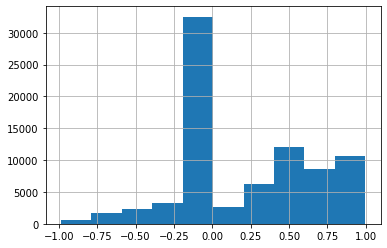

In [10]:
# Distribuição de valores de sentimento
Marco["Sentimento"].hist(bins=10)

Grande maior parte dos dados de sentimento estão entre 0 e -0,25. Quando se trata de sentimentos positivos, estes tendem a ser mais intensos, com pouca quantidade estando entre 0 e 0,25. Uma interpretação é que a maior parte das opiniões emitidas quanto ao bitcoin são levemente céticas, mas aqueles que acreditam no criptoativo são grandes defensores deste.

<AxesSubplot:>

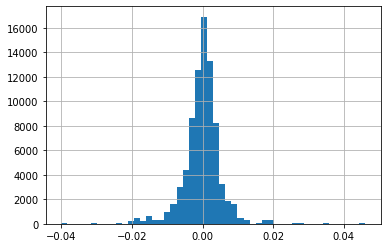

In [11]:
# Histograma dos retornos (%) - Distribuição normal(?)
Marco["Retornos"].hist(bins=50)

In [12]:
# Somar os valores de sentimento para uma hora, a fim de se obter o sentimento geral.
# Se o total >0, então o sentimento naquela hora foi positivo, se não, foi negativo
def Obter_Sentimento_Hora(mes,dia,hora):
    hora = f"0{hora}" if hora <10 else hora
    Agreg_numerico = Dados.loc[f"2022-0{mes}-0{dia} {hora}"]["Sentimento"].sum()
    Sentimento = "Positivo" if Agreg_numerico > 0 else "Negativo"
    return Sentimento

# Resultados
Obter_Sentimento_Hora(3, 6, 8)

'Positivo'

In [13]:
# Criar coluna que transforma variável sentimento em variável categórica binária
Dados["Sentimento_Categorico"] = ["Positivo" if sentimento > 0 else "Negativo" for sentimento in Dados["Sentimento"]]
Dados.head()

,Tweets,Sentimento,Close,Retornos,Sentimento_Categorico
Horario,,,,,
2022-03-02 04:00:00+00:00,"RT @BitcoinStimulus: $7,852 (+554%)\r\n\r\n#bi...",0.0000,44273.210938,-0.002187,Negativo
2022-03-02 04:00:00+00:00,@TheMoonCarl You say you’re willing to gain we...,0.5994,44273.210938,-0.002187,Positivo
2022-03-02 04:00:00+00:00,RT @Cointelegraph: Some on-chain stats still b...,0.0000,44273.210938,-0.002187,Negativo
2022-03-02 04:00:00+00:00,"RT @bre_jew: @bitcoin_brown omg, I'm getting f...",-0.5574,44273.210938,-0.002187,Negativo
2022-03-02 04:00:00+00:00,RT @BTC_Archive: 💥El Salvador President: The i...,0.3400,44273.210938,-0.002187,Positivo


In [14]:
# Predominância dos valores de sentimento neutro (em %)
Dados.loc[Dados["Sentimento"] == 0,"Sentimento_Categorico"].shape[0] / Dados.shape[0]

0.38016502288403276

In [15]:
# Criar categoria "Neutro" para valores de sentimento == 0
Dados.loc[Dados["Sentimento"] == 0,"Sentimento_Categorico"] = "Neutro"
Dados

,Tweets,Sentimento,Close,Retornos,Sentimento_Categorico
Horario,,,,,
2022-03-02 04:00:00+00:00,"RT @BitcoinStimulus: $7,852 (+554%)\r\n\r\n#bi...",0.0000,44273.210938,-0.002187,Neutro
2022-03-02 04:00:00+00:00,@TheMoonCarl You say you’re willing to gain we...,0.5994,44273.210938,-0.002187,Positivo
2022-03-02 04:00:00+00:00,RT @Cointelegraph: Some on-chain stats still b...,0.0000,44273.210938,-0.002187,Neutro
2022-03-02 04:00:00+00:00,"RT @bre_jew: @bitcoin_brown omg, I'm getting f...",-0.5574,44273.210938,-0.002187,Negativo
2022-03-02 04:00:00+00:00,RT @BTC_Archive: 💥El Salvador President: The i...,0.3400,44273.210938,-0.002187,Positivo
...,...,...,...,...,...
2022-04-06 02:00:00+00:00,@mckalyn Hi. \nDo you seek financial freedom? ...,0.7941,45256.906250,0.001428,Positivo
2022-04-06 02:00:00+00:00,RT @PoloSpaceTravel: 🚀Latest News: Poloniex wi...,0.0000,45256.906250,0.001428,Neutro
2022-04-06 02:00:00+00:00,RT @airdropinspect: New airdrop: Yield360 (Y36...,0.8766,45256.906250,0.001428,Positivo


<AxesSubplot:>

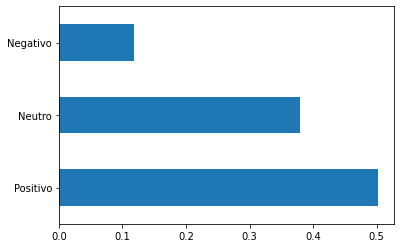

In [16]:
# Plotar frequência dos sentimentos
(Dados["Sentimento_Categorico"].value_counts() / Dados.shape[0]).plot(kind="barh")

<AxesSubplot:xlabel='Sentimento', ylabel='Retornos'>

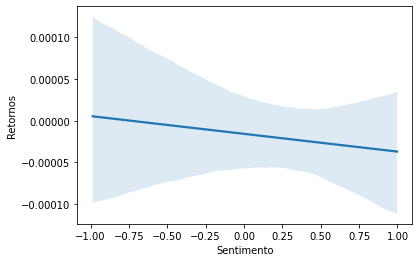

In [17]:
# Regression Plot 
regplot(x=Dados["Sentimento"], y=Dados["Retornos"], scatter=False, fit_reg=True)

In [28]:
# Agrupar por dia e hora e calcular a soma dos sentimentos para cada substrato de tempo
Dados.groupby([Dados.index.day, Dados.index.hour])["Sentimento"].sum()

Horario  Horario
1        0           60.9848
         1           28.1278
         2           32.2448
         3           17.8111
         4           20.1254
                      ...   
31       18          76.8724
         19         112.7308
         20          80.6372
         21         118.1272
         22          94.4044
Name: Sentimento, Length: 713, dtype: float64